In [34]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_colwidth', 100)

from statsmodels.tsa.stattools import grangercausalitytests

# Import Data

In [35]:
gctay = pd.read_csv('./gctay_closing_popularity_sentiment.csv')

In [36]:
gctay.set_index('Date', inplace=True)

In [37]:
gctay_normalized = pd.read_csv('./gctay_normalized_closing_popularity_sentiment.csv')

In [38]:
gctay_normalized.set_index('Date', inplace=True)

# Explore Datasets

<AxesSubplot:xlabel='Date'>

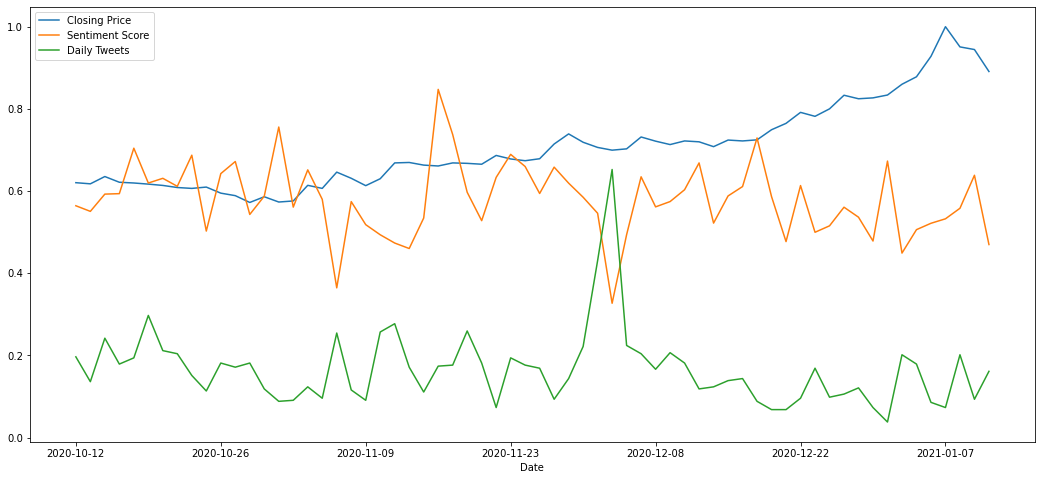

In [40]:
gctay_normalized[['Closing Price','Sentiment Score','Daily Tweets']]['2020-10-12':'2021-01-12'].plot(figsize=(18,8))

# Lag Analysis

In [7]:
def plot_cross_correlation(df):
    fig, ax1 = plt.subplots(figsize=(18,5))
    ax1.xcorr(df['Sentiment Score'].to_numpy().flatten(), df['Closing Price'].to_numpy().flatten(), usevlines=True, maxlags=10, normed=True, lw=2)
    ax1.grid(True)
    plt.show()

In [9]:
gctay_normalized

,Closing Price,Daily Tweets,Sentiment Score
Date,,,
2011-01-03,0.151872,0.010076,0.654792
2011-01-04,0.151872,0.012594,0.508204
2011-01-05,0.151872,0.010076,0.662024
2011-01-06,0.151872,0.005038,0.577093
2011-01-07,0.151872,0.007557,0.428525
...,...,...,...
2021-03-26,0.708021,0.236776,0.517323
2021-03-29,0.713369,0.294710,0.466927
2021-03-30,0.754278,0.322418,0.615123


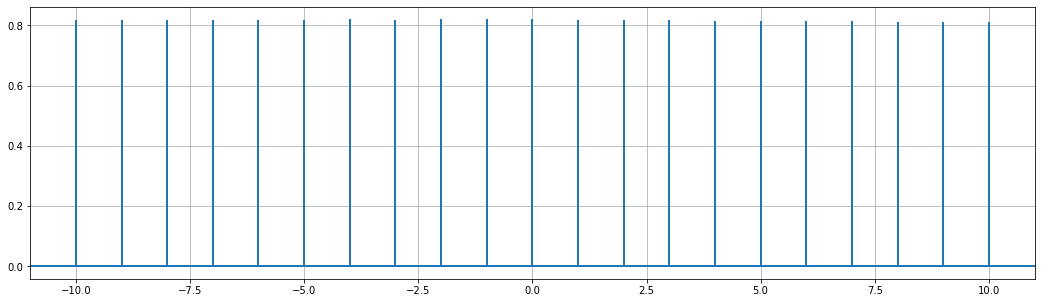

In [11]:
plot_cross_correlation(gctay_normalized)

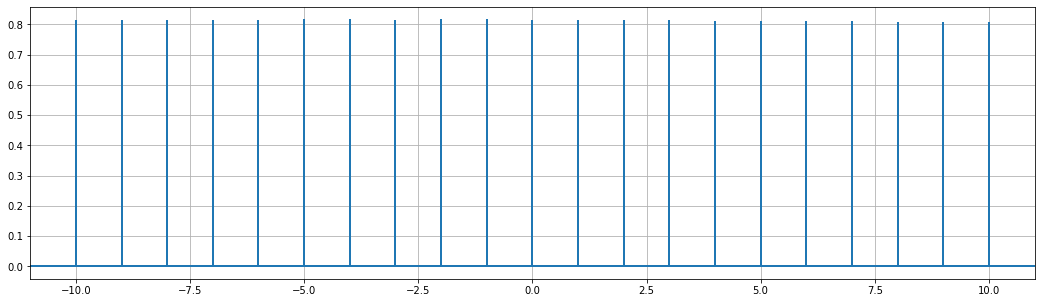

In [12]:
plot_cross_correlation(gctay)

In [13]:
def plot_cross_correlation_v2(df):
    fig, ax1 = plt.subplots(figsize=(18,5))
    ax1.xcorr(df['Sentiment Score'].to_numpy().flatten(), df['Closing Price'].to_numpy().flatten(), usevlines=True, maxlags=100*7, normed=True)
    ax1.grid(True)
    plt.show()

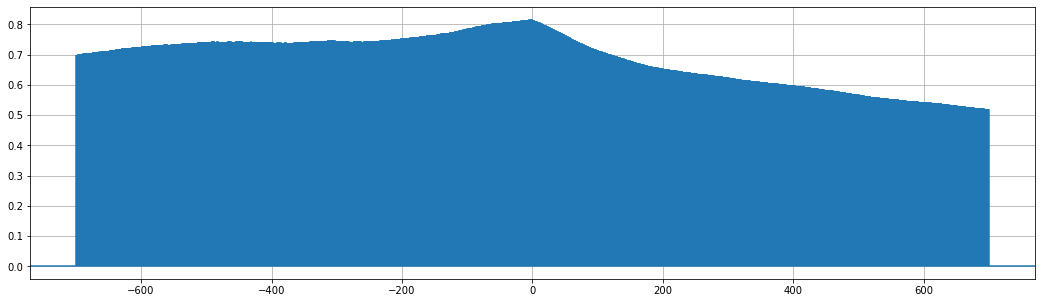

In [14]:
plot_cross_correlation_v2(gctay)

In [19]:
def plot_cross_correlation_v3(df):
    fig, ax1 = plt.subplots(figsize=(18,5))
    test = ax1.xcorr(df['Sentiment Score'].to_numpy().flatten(), df['Closing Price'].to_numpy().flatten(), usevlines=False, maxlags=40)
    ax1.grid(True)
    plt.show()
    return test

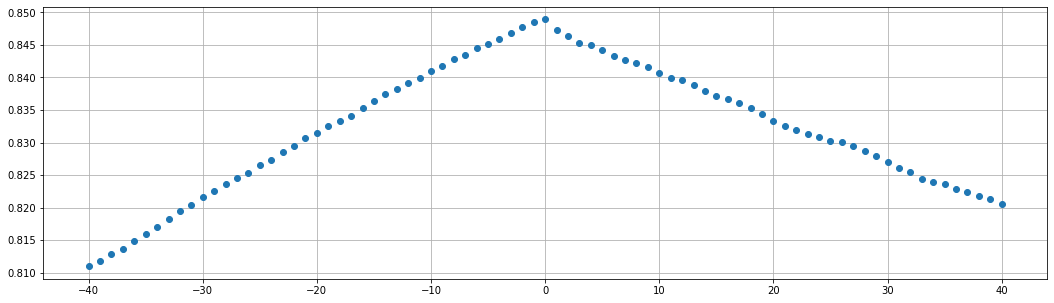

In [20]:
result = plot_cross_correlation_v3(fslr_normalized)

In [19]:
result

(array([-40, -39, -38, -37, -36, -35, -34, -33, -32, -31, -30, -29, -28,
        -27, -26, -25, -24, -23, -22, -21, -20, -19, -18, -17, -16, -15,
        -14, -13, -12, -11, -10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,
         -1,   0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,
         12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,
         25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,
         38,  39,  40]),
 array([0.81096459, 0.81182323, 0.81286458, 0.81368288, 0.81486447,
        0.81600356, 0.81707599, 0.81828732, 0.81947061, 0.82041522,
        0.82169879, 0.82259464, 0.8236155 , 0.82448006, 0.82532606,
        0.82653294, 0.82734804, 0.82855799, 0.82951497, 0.8306277 ,
        0.83143469, 0.83247704, 0.83323472, 0.83413534, 0.83534904,
        0.83633851, 0.83737873, 0.83822036, 0.83920789, 0.83991967,
        0.84092216, 0.84182271, 0.84277812, 0.84351114, 0.84449114,
        0.84516735, 0.84595559, 0.84686701, 0.84776354, 0.848

# Granger Causality 

In [21]:
fslr.columns

Index(['Closing Price', 'Daily Tweets', 'Sentiment Score'], dtype='object')

In [24]:
data = np.asarray(fslr[['Sentiment Score', 'Closing Price']])
maxlag = 10
grangercausalitytests(data, maxlag, addconst=True, verbose=True)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.7580  , p=0.3840  , df_denom=2536, df_num=1
ssr based chi2 test:   chi2=0.7589  , p=0.3837  , df=1
likelihood ratio test: chi2=0.7588  , p=0.3837  , df=1
parameter F test:         F=0.7580  , p=0.3840  , df_denom=2536, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.7607  , p=0.4674  , df_denom=2533, df_num=2
ssr based chi2 test:   chi2=1.5244  , p=0.4666  , df=2
likelihood ratio test: chi2=1.5239  , p=0.4667  , df=2
parameter F test:         F=0.7607  , p=0.4674  , df_denom=2533, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.5313  , p=0.6608  , df_denom=2530, df_num=3
ssr based chi2 test:   chi2=1.5984  , p=0.6597  , df=3
likelihood ratio test: chi2=1.5979  , p=0.6599  , df=3
parameter F test:         F=0.5313  , p=0.6608  , df_denom=2530, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.8052  , p=0.

{1: ({'ssr_ftest': (0.7579809277024192, 0.38404352847660284, 2536.0, 1),
   'ssr_chi2test': (0.7588775928377138, 0.3836800054797165, 1),
   'lrtest': (0.758764205585976, 0.38371553822715143, 1),
   'params_ftest': (0.7579809277030485, 0.3840435284763375, 2536.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (0.7606982483029451, 0.46744672660298714, 2533.0, 2),
   'ssr_chi2test': (1.5243996480006905, 0.4666387739220009, 2),
   'lrtest': (1.523942030935359, 0.46674555707112886, 2),
   'params_ftest': (0.7606982483025901, 0.46744672660318454, 2533.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (0.531336195892297, 0.6607915620163054, 2530.0, 3),
   'ssr_chi2test': (1.5984188881171035, 0.6597483793622883, 3),
   'lrtest': (1.5979155632649054, 0.6598625440902672, 3),
   'params_ftest': (0.5313361958923956, 0.6607915620161776, 2530.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 

In [25]:
data = np.asarray(fslr_normalized[['Sentiment Score', 'Closing Price']])
maxlag = 10
grangercausalitytests(data, maxlag, addconst=True, verbose=True)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.7580  , p=0.3840  , df_denom=2536, df_num=1
ssr based chi2 test:   chi2=0.7589  , p=0.3837  , df=1
likelihood ratio test: chi2=0.7588  , p=0.3837  , df=1
parameter F test:         F=0.7580  , p=0.3840  , df_denom=2536, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.7607  , p=0.4674  , df_denom=2533, df_num=2
ssr based chi2 test:   chi2=1.5244  , p=0.4666  , df=2
likelihood ratio test: chi2=1.5239  , p=0.4667  , df=2
parameter F test:         F=0.7607  , p=0.4674  , df_denom=2533, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.5313  , p=0.6608  , df_denom=2530, df_num=3
ssr based chi2 test:   chi2=1.5984  , p=0.6597  , df=3
likelihood ratio test: chi2=1.5979  , p=0.6599  , df=3
parameter F test:         F=0.5313  , p=0.6608  , df_denom=2530, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.8052  , p=0.

{1: ({'ssr_ftest': (0.7579809277033068, 0.3840435284763375, 2536.0, 1),
   'ssr_chi2test': (0.7588775928386025, 0.38368000547943815, 1),
   'lrtest': (0.758764205584157, 0.38371553822772164, 1),
   'params_ftest': (0.7579809277029397, 0.3840435284763375, 2536.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (0.7606982483031389, 0.4674467266028558, 2533.0, 2),
   'ssr_chi2test': (1.5243996480010789, 0.4666387739219102, 2),
   'lrtest': (1.523942030938997, 0.46674555707027976, 2),
   'params_ftest': (0.760698248303115, 0.46744672660298714, 2533.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (0.5313361958921928, 0.6607915620163688, 2530.0, 3),
   'ssr_chi2test': (1.5984188881167904, 0.6597483793623593, 3),
   'lrtest': (1.5979155632649054, 0.6598625440902672, 3),
   'params_ftest': (0.5313361958921932, 0.6607915620163688, 2530.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0

# Plotting 

In [61]:
fslr_normalized.columns

Index(['Closing Price', 'Daily Tweets', 'Sentiment Score'], dtype='object')

<AxesSubplot:xlabel='Date'>

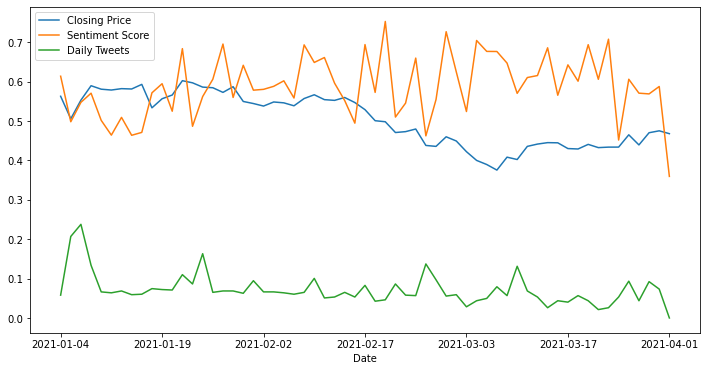

In [69]:
fslr_normalized[['Closing Price','Sentiment Score','Daily Tweets']]['2021-01-01':'2021-04-01'].plot(figsize=(12,6))

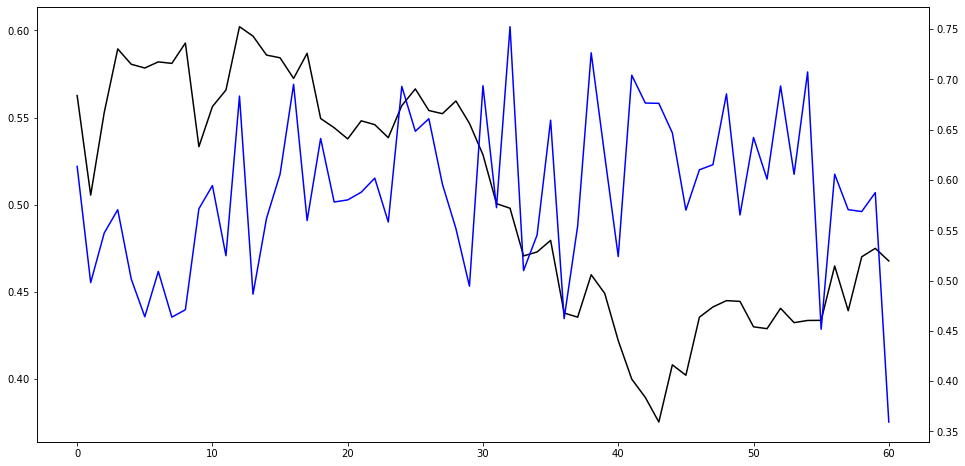

In [85]:
fig, ax1 = plt.subplots(figsize=(16,8))
ax2 = ax1.twinx()

ax1.plot(fslr_normalized['2021-01-01':]['Closing Price'].to_numpy().flatten(), color ='black')
# ax2.plot(fslr_normalized['2021-01-01':]['Daily Tweets'].to_numpy().flatten(), color='blue')
ax2.plot(fslr_normalized['2021-01-01':]['Sentiment Score'].to_numpy().flatten(), color='blue')
plt.show()

https://matplotlib.org/stable/gallery/subplots_axes_and_figures/two_scales.html

In [88]:
fslr_normalized.reset_indetx(inplace=True)

In [89]:
fslr_normalized

,Date,Closing Price,Daily Tweets,Sentiment Score
0,2011-01-03,0.760926,0.008274,0.674062
1,2011-01-04,0.750487,0.002364,0.458135
2,2011-01-05,0.753506,0.009456,0.608638
3,2011-01-06,0.771930,0.017730,0.382027
4,2011-01-07,0.765956,0.029551,0.375734
...,...,...,...,...
2535,2021-03-26,0.464818,0.093381,0.605803
2536,2021-03-29,0.439162,0.043735,0.570483
2537,2021-03-30,0.470100,0.092199,0.568617
2538,2021-03-31,0.474942,0.073286,0.587444


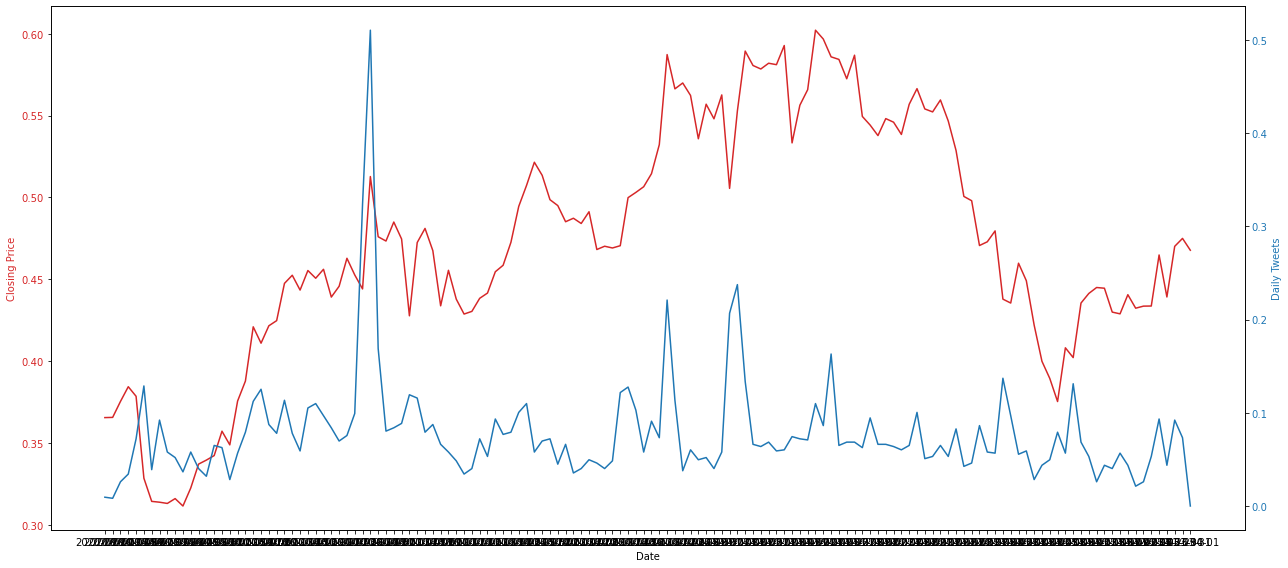

In [102]:
t = fslr_normalized[2400:]['Date'].to_numpy().flatten()

data1 = fslr_normalized[2400:]['Closing Price'].to_numpy().flatten()
# data2 = fslr_normalized[2400:]['Sentiment Score'].to_numpy().flatten()
data2 = fslr_normalized[2400:]['Daily Tweets'].to_numpy().flatten()

fig, ax1 = plt.subplots(figsize=(18,8))

color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('Closing Price', color=color)
ax1.plot(t, data1, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Daily Tweets', color=color)  # we already handled the x-label with ax1
ax2.plot(t, data2, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [105]:
fslr_normalized.set_index('Date',inplace=True)

<AxesSubplot:xlabel='Date'>

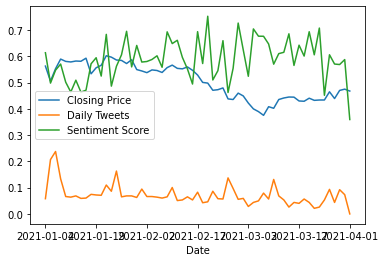

In [110]:
fslr_normalized['2021-01-01':].plot()